In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("CarPricesPrediction.csv")

df.head()


,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [3]:
df.shape


(1000, 7)

In [4]:
df.isnull().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


## Data Preprocessing

In [6]:
print(df.Make.value_counts())
print(df.Model.value_counts())
print(df.Condition.value_counts())

Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: count, dtype: int64
Model
Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: count, dtype: int64
Condition
Excellent    595
Good         292
Fair         113
Name: count, dtype: int64


### Encoding the categorical variable into the Binary format

In [30]:
df.replace({"Make":{'Chevrolet':0,"Toyota":1,"Ford":2,"Honda":3,"Nissan":4}},inplace=True)
df.replace({"Model":{'Altima':0,"Camry":1,"Silverado":2,"F-150":3,"Civic":4}},inplace=True)
df.replace({"Condition":{'Excellent':0,"Good":1,"Fair":2}},inplace=True)


In [8]:
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,2,2,2022,18107,0,19094.75
1,1,1,2,2014,13578,0,27321.10
2,2,0,4,2016,46054,1,23697.30
3,3,2,4,2022,34981,0,18251.05
4,4,0,4,2019,63565,0,19821.85


## Extract Dependent and independent Variable

In [9]:
x=df.drop(["Unnamed: 0","Price"],axis=1) #independent Variable
y=df["Price"] #Dependent variable

In [10]:
print(x)

     Make  Model  Year  Mileage  Condition
0       2      2  2022    18107          0
1       1      2  2014    13578          0
2       0      4  2016    46054          1
3       2      4  2022    34981          0
4       0      4  2019    63565          0
..    ...    ...   ...      ...        ...
995     4      1  2010   149032          0
996     0      3  2014    20608          0
997     2      0  2016   109851          1
998     1      2  2010    11704          1
999     4      2  2017   128390          0

[1000 rows x 5 columns]


In [11]:
print(y)

0      19094.75
1      27321.10
2      23697.30
3      18251.05
4      19821.85
         ...   
995    24548.50
996    26969.70
997    20507.55
998    31414.90
999    18580.60
Name: Price, Length: 1000, dtype: float64


In [24]:
x.shape[0]

1000

In [25]:

y.shape[0]



1000

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [29]:
Prediction=linear_model.predict(x_test)

In [31]:
r2 = r2_score(y_test, Prediction)
print(f'R² score: {r2}')

R² score: 0.9999999997672671


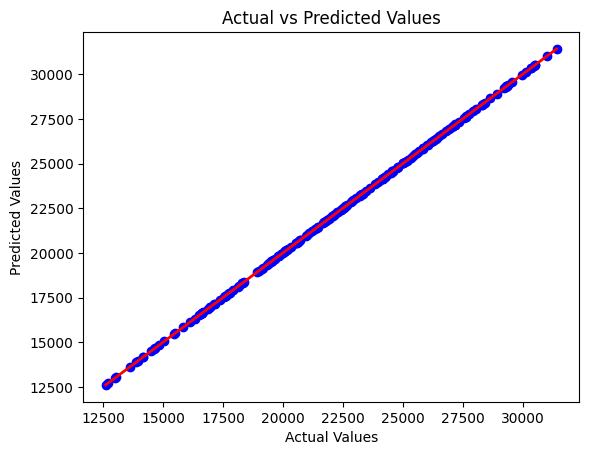

In [33]:
plt.scatter(y_test, Prediction, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line showing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()